# SIMPLE MACHINE LEARNING CODE BY CROSS VALIDATION
This is a simple quick machine learning python code to run on the iris dataset from [UCI Repository](https://archive.ics.uci.edu/ml/datasets/iris)

In [ ]:
# IMPORT REQUIRED LIBRARY
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

## 1.0 LOAD DATASET
Following code will download the dataset from UCI repository and save the dataset as "iris.data". 

In [ ]:
# DOWNLOAD FILE FUNCTION
def download_dataset(url, filename):
  r = requests.get(url)
  with open(filename, 'wb') as f:
    f.write(r.content)

# DOWNLOAD FILE FROM URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset_filename='iris.data'
download_dataset(url, 'iris.data')

# LOAD THE DOWNLOADED FILE BY FILE NAME
# MANUALLY ASSIGN THE COLUMN NAMES
df = pd.read_csv(dataset_filename, sep=",", 
                 names= ["sepal_lengt", "sepal_width", "petal_length", "petal_width", "class"])

## 2.0 UNDERSTANDING DATASET
Following code will download the dataset from UCI repository and save the dataset as "iris.data". 

In [ ]:
# DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lengt   150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# DESCRIBE DATASET
df.describe()

,sepal_lengt,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# SHOW FIRST 10 INSTANCES
df.head(10)

,sepal_lengt,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## 3.0 PREPARE TRAINING AND TESTING DATASET
Following code will download the dataset from UCI repository and save the dataset as "iris.data". 

### 3.1 IMPORT LIBRARIES
In this sample code, we will be using [sklearn](https://scikit-learn.org/)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedKFold

### 3.2 SPLIT FEATURES AND CLASS
- "y" is the class column
- "X" is the all features columns

In [ ]:
y = df.loc[:, ["class"]].values
X = df.loc[:, ["sepal_lengt", "sepal_width", "petal_length", "petal_width"]].values

print("Number of Row in X (Class): {}".format(len(X)))
print("Number of Row in y (Features): {}".format(len(y)))

Number of Row in X (Class): 150
Number of Row in y (Features): 150


### SETUP CROSS VALIDATION (Repeat k Fold)
You can refer to this [Sklearn page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html) about the configuration

In [ ]:
random_state = random.randint(100000,999999)
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)

In [ ]:
def generate_confusion_matrix(name, clf, X, y):
  
  class_names = df["class"].unique()
  
  disp = plot_confusion_matrix(clf, X, y, display_labels=class_names,
                                 cmap=plt.cm.Blues)

  #plt.title("Confusion matrix of {} {}".format(wordvectorname, name))
  img_file_name = "{}_confusion_matrix.png".format(name)
  plt.savefig(img_file_name.lower())
  plt.show()


def run_ML(model_name, clf, X, y, rkf, df):

  # TRAIN THE MODEL BY USING K-FLOD
  for train_index, test_index in rkf.split(df):

    # SPLIT TRAINING AND TESTING SET FOR FEATURE
    X_train, X_test = X[train_index], X[test_index]

    # SPLIT TRAINING AND TESTING SET FOR CLASS
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train.ravel())

  # USE THE TRAINED MODEL TO PREDICT THE ENTIRE X
  y_pred = clf.predict(X)

  print("-----------------------------")
  print("- " + model_name)
  print("-----------------------------")
  print('Accuracy: {}'.format(round(accuracy_score(y, y_pred), 4)))
  print('F1 score: {}'.format(round(f1_score(y, y_pred, average='macro'), 4)))
  print('Precision score: {}'.format(round(precision_score(y, y_pred, average='macro'), 4)))
  print('Recall score: {} \n'.format(round(recall_score(y, y_pred, average='macro'), 4)))

  generate_confusion_matrix(model_name, clf, X, y)


## 4.0 Run Machine Learning

### 4.1 Naive Bayes
Please refer to [Sklearn Naive Bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) for more model setup. In following example will be using GaussianNB.

-----------------------------
- CategoricalNB
-----------------------------
Accuracy: 0.9333
F1 score: 0.9331
Precision score: 0.9372
Recall score: 0.9333 



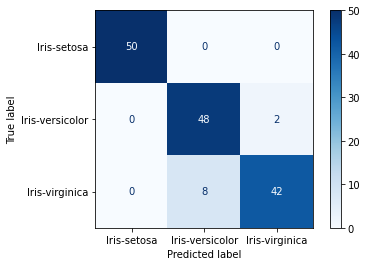

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB

# INITIATE ML MODEL
clf = CategoricalNB()

run_ML("CategoricalNB", clf, X, y, rkf, df)

### 4.2 Random Forest
Please refer to [Sklearn Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier) for more model setup

-----------------------------
- RandomForestClassifier
-----------------------------
Accuracy: 0.9667
F1 score: 0.9666
Precision score: 0.9678
Recall score: 0.9667 



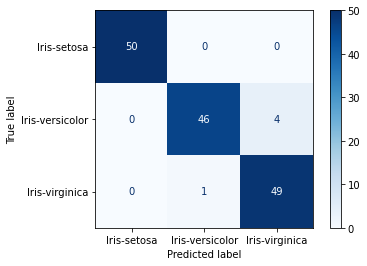

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# INITIATE ML MODEL
clf = RandomForestClassifier(max_depth=2, random_state=0)

run_ML("RandomForestClassifier", clf, X, y, rkf, df)

### 4.3 Logistic Regression
Please refer to [Sklearn Logistic](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression) for more model setup.

-----------------------------
- LogisticRegression
-----------------------------
Accuracy: 0.9667
F1 score: 0.9667
Precision score: 0.9668
Recall score: 0.9667 



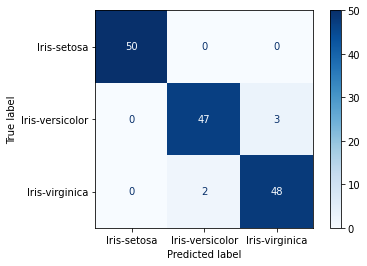

In [ ]:
from sklearn.linear_model import LogisticRegression

# INITIATE ML MODEL
clf = LogisticRegression(random_state=0, max_iter=150)

run_ML("LogisticRegression", clf, X, y, rkf, df)

### 4.4 SVM
Please refer to [Sklearn SVM (Linear)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVCR) for more model setup.

-----------------------------
- LinearSVC
-----------------------------
Accuracy: 0.9733
F1 score: 0.9733
Precision score: 0.9753
Recall score: 0.9733 



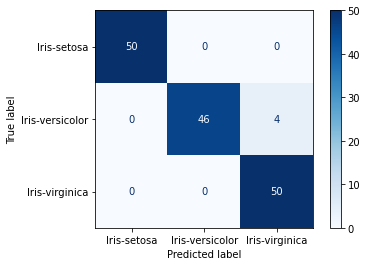

In [ ]:
from sklearn.svm import LinearSVC

# INITIATE ML MODEL
clf = LinearSVC(random_state=0, max_iter=4000)

run_ML("LinearSVC", clf, X, y, rkf, df)